<a href="https://colab.research.google.com/github/HarryWei530/Frequentist_ML/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

################ PART A ################
(77, 8)
Beta =  [ 2.07522623  0.4399669   0.31765933 -0.10039156  0.111795    0.11553981
 -0.1680607   0.15359411  0.07570128]
Mean Square Error =  2.5994406511426473
Correlation Matrix (Table 3.1)


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652
lweight,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354
age,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112
lbph,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460
svi,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648
lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528
gleason,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905
pgg45,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000


Z score table (Table 3.2)


,Term,Coefficient,Std.Error,Z Score
0,Constant,2.075226,0.069461,29.875992
1,lcavol,0.439967,0.095931,4.586298
2,lweight,0.317659,0.085788,3.702822
3,age,-0.100392,0.082273,-1.220228
4,lbph,0.111795,0.085774,1.303362
5,svi,0.115540,0.093146,1.240414
6,lcp,-0.168061,0.118407,-1.419343
7,gleason,0.153594,0.118152,1.299974
8,pgg45,0.075701,0.122444,0.618250


################ PART B ################
Optimum Lambda =  88.89 Min MSE =  20.658773550668034


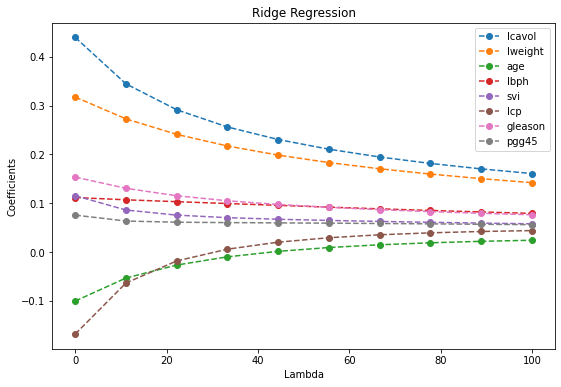

################ PART C ################
Optimum Lambda =  0.33366666666666667 Min MSE =  6.270799753800473


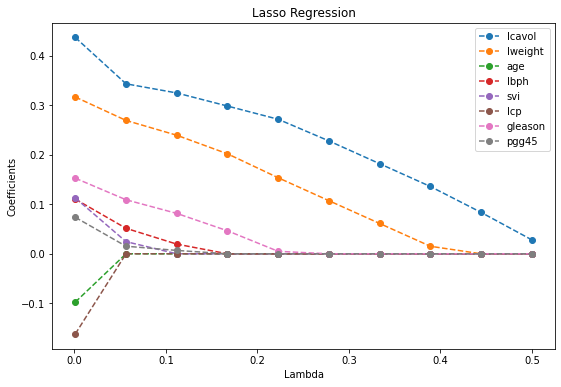

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data",sep = "\t") #Import Prostate Cancer Data
df = df.drop(labels=["Unnamed: 0","train"],axis=1) #Drop Number of Rows Column
df.sample(frac=1,random_state=100).reset_index()

train = df[0:77] #Split trainning, test and validation set, 80% training, 10% each for test and validation
test = df[77:87]
validation = df[87:]

def scaling(input_df): #Subtract mean and divide by std to scale data
  input_df = input_df.subtract(input_df.mean()).divide(input_df.std(ddof=0))
  return input_df

##############################################
print("################ PART A ################")
# A.Linear Regression, MSE, Correlation Matrix and Z Score Table 
# Variable Setup
X = scaling(train.drop(['lpsa'],axis = 1)) #Extract features from training set and normaliza feature set X
X.insert(0,'Constant',np.ones((X.shape[0],1))) #Insert ones to first column of training set
y = train['lpsa'].to_numpy() #Extract lables from training set
test_feat = scaling(test.drop(['lpsa'],axis = 1)) #Extract features from test set and normaliza feature set test_feat
test_feat.insert(0,'Constant',np.ones((test_feat.shape[0],1))) #Insert ones to first column of test_feat
# Rregression
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)),X.transpose()),y) #Eq 3.6 to find optimal beta
print("Beta = ",beta)
prediction = test_feat.dot(beta) #Perform prediction using calculated beta
MSE = ((prediction - test['lpsa']).pow(2).sum())/prediction.size #Cculate mean squared error
print("Mean Square Error = ",MSE)
# Correlation Matrix (Table 3.1)
corr = df.corr(method='pearson')
corr.drop(labels="lpsa",axis=1,inplace=True)
corr.drop(labels="lpsa",axis=0,inplace=True)
print("Correlation Matrix (Table 3.1)")
display(corr)
# Z Score Table (Table 3.2)
# sigma_hat = np.sqrt((1/(X.shape[0]-X.shape[1]-1))*((prediction - test['lpsa']).pow(2).sum())) 
sigma_hat = np.sqrt((1/(X.shape[0]-X.shape[1]-1))*((np.dot(X,beta) - train['lpsa']).pow(2).sum())) #Eq 3.8 denomenator
V_diag = np.diag(np.linalg.inv(np.dot(X.T,X))) #Diagnal components of variance matric
std_error = sigma_hat*np.sqrt(V_diag)
z_score = np.divide(beta,std_error) #Eq 3.12

z_score_table = pd.DataFrame({"Term":X.columns,"Coefficient":beta,"Std.Error":std_error,"Z Score": z_score}) #Format as table 3.2

print("Z score table (Table 3.2)")
display(z_score_table)
##############################################
print("################ PART B ################")
# B.Ridge Regression
# Variable Setup
X = scaling(train.drop(['lpsa'],axis = 1)) #Extract features from training set and normalize X
y = train['lpsa'].to_numpy() #Extract lables from training set
test_feat = scaling(test.drop(['lpsa'],axis = 1)) #Extract features from test set
validation_feat = scaling(validation.drop(['lpsa'],axis = 1)) #Extract features from validation set

lambda_ridge = np.linspace(0.01,100,10,dtype=float) #Lambda as 0:100
beta_ridge = np.empty((1,X.shape[1])) #Initialize empty array to store betas
optimum_lambda = 0
MSE_min = 10000 #random big value initialization
for cur_lamda in lambda_ridge:
  # cur_beta_ridge = (X.T*X + lambda*I)^-1*X.T*y
  cur_beta_ridge = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)+cur_lamda*np.identity(X.shape[1])),X.T),y) #Eq 3.44
  prediction = validation_feat.dot(cur_beta_ridge) #Perform prediction using calculated beta and validation features
  MSE = ((prediction - validation['lpsa']).pow(2).sum())/prediction.size #Cculate MSE 
  if MSE<MSE_min:
    MSE_min = MSE
    optimum_lambda = cur_lamda
  cur_beta_ridge = np.reshape(cur_beta_ridge,(1,cur_beta_ridge.shape[0])) #Append current beta to the list of lambdas
  beta_ridge = np.concatenate((beta_ridge,cur_beta_ridge),axis = 0)
beta_ridge = beta_ridge[1:] #Exclude empty row

print("Optimum Lambda = ",optimum_lambda, "Min MSE = ",MSE_min)

plt.figure(figsize=(9,6))
for i in range(0,beta_ridge.shape[1]):
    plt.plot(lambda_ridge,beta_ridge[:,i],'--o')
plt.legend(test_feat.columns)
plt.xlabel("Lambda")
plt.ylabel("Coefficients")
plt.title("Ridge Regression")
plt.show()
##############################################
print("################ PART C ################")
# C.Lasso Regression using Scikit-Learn
from sklearn import linear_model
X = scaling(train.drop(['lpsa'],axis = 1)) #Extract features from training set
y = train['lpsa'].to_numpy() #Extract lables from training set
test_feat = scaling(test.drop(['lpsa'],axis = 1)) #Extract features from test set
validation_feat = scaling(validation.drop(['lpsa'],axis = 1)) #Extract features from validation set

lambda_lasso = np.linspace(0.001,0.5,10,dtype=float) #Lambda as 0:20
beta_lasso = np.empty((1,X.shape[1])) #Initialize empty array to store betas
optimum_lambda_lasso = 0
MSE_min = 10000 #random big value initialization
for cur_lamda_lasso in lambda_lasso:
  lasso = linear_model.Lasso(alpha=cur_lamda_lasso)
  lasso.fit(X,y)
  prediction = lasso.predict(validation_feat)
  MSE = ((prediction - validation['lpsa']).pow(2).sum())/prediction.size #Cculate MSE 
  if MSE<MSE_min:
    MSE_min = MSE
    optimum_lambda = cur_lamda_lasso
  coef = np.reshape(lasso.coef_,(1,lasso.coef_.shape[0])) #Append current beta to the list of lambdas
  beta_lasso = np.concatenate((beta_lasso,coef),axis = 0)
beta_lasso = beta_lasso[1:] #Exclude empty row

print("Optimum Lambda = ",optimum_lambda, "Min MSE = ",MSE_min)
plt.figure(figsize=(9,6))
for i in range(0,beta_lasso.shape[1]):
    plt.plot(lambda_lasso,beta_lasso[:,i],'--o')
plt.legend(test_feat.columns)
plt.xlabel("Lambda")
plt.ylabel("Coefficients")
plt.title("Lasso Regression")
plt.show()

################ PART C External ################
Beijing PM2.5 Data


,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
23203,2012,11,5,1,21.0,-3,5.0,1018.0,280.31,0,0
9013,2011,2,11,10,132.0,-13,-2.0,1030.0,23.25,0,0
31437,2013,10,22,23,95.0,5,9.0,1020.0,4.02,0,0
25784,2013,2,27,4,414.0,-4,-4.0,1018.0,0.45,0,0
37232,2014,6,23,17,26.0,12,31.0,1005.0,1.79,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16304,2012,1,8,13,149.0,-8,0.0,1031.0,1.78,0,0
79,2010,1,5,7,27.0,-27,-16.0,1034.0,13.86,0,0
12119,2011,7,5,4,67.0,17,27.0,1001.0,46.48,0,0
14147,2011,10,9,5,324.0,14,15.0,1017.0,3.58,0,0


Optimum Lambda = 0.001 MSE_Ridge = 16204.86


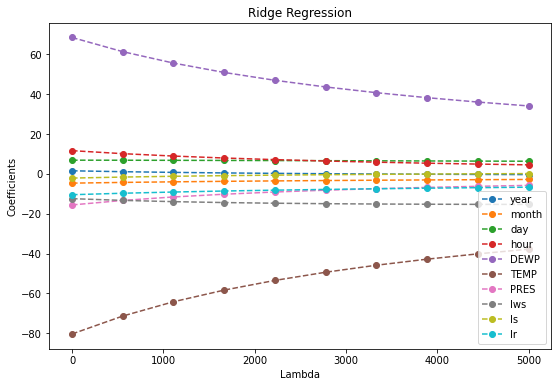

-------- Beta_Lasso vs Lambda Plot --------


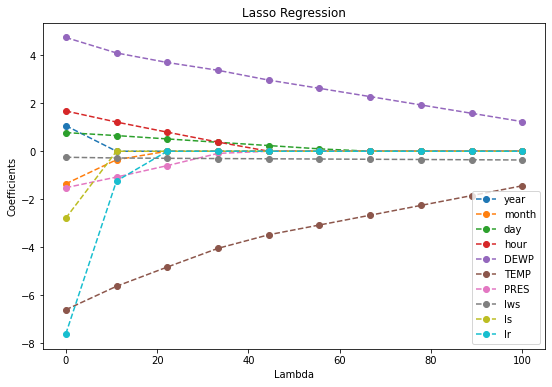

Coefficient Matrix for Lasso, Linear, and Ridge regressions


,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
Linear,1.507307,-4.682213,6.833822,11.611927,68.403627,-80.361870,-15.622867,-12.469132,-2.143344,-10.491295
Ridge (Opt),1.507307,-4.682212,6.833822,11.611924,68.403613,-80.361852,-15.622862,-12.469134,-2.143343,-10.491293
Lasso (Opt),1.064819,-1.355012,0.776067,1.675933,4.735373,-6.597875,-1.517538,-0.250844,-2.785876,-7.605888


MSE Linear = 6267.77 Linear baseline = 274.60
MSE Ridge = 16204.86 Linear baseline = 1516.55
MSE Lasso = 7334.87 Linear baseline = 62.53


In [92]:
##############################################
# C.Lasso Regression with external data set
print("################ PART C External ################")
from sklearn import linear_model
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv") #Import Prostate Cancer Data
# df = df.drop(["No"],axis=1)
df = df.dropna().reset_index().drop(["cbwd","index","No"],axis=1)
df = df.sample(frac=1,random_state=100) # Randomize Data Set
print("Beijing PM2.5 Data")
display(df)

train = df[0:int(df.shape[0]*0.8)]
test = df[int(df.shape[0]*0.8)+1:int(df.shape[0]*0.9)]
validation = df[int(df.shape[0]*0.9)+1:]

train_feat = train.drop(["pm2.5"],axis = 1) # Scale Features
test_feat = test.drop(["pm2.5"],axis = 1)
validation_feat = validation.drop(["pm2.5"],axis = 1)

train_label = train["pm2.5"] # Extract Labels
test_label = test["pm2.5"]
validation_label = validation["pm2.5"]

# Linear regression
X = scaling(train_feat) #Extract features from training set and normaliza feature set X
X.insert(0,'Constant',np.ones((X.shape[0],1))) #Insert ones to first column of training set
X_test = scaling(test_feat) #Extract features from training set and normaliza feature set X
X_test.insert(0,'Constant',np.ones((X_test.shape[0],1))) #Insert ones to first column of training set

beta_linear = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)),X.transpose()),train_label) #Eq 3.6 to find optimal beta
prediction = X_test.dot(beta_linear) #Perform prediction using calculated beta
MSE_linear = ((prediction - test_label).pow(2).sum())/prediction.size #Cculate mean squared error
MSE_linear_baseline = 1/X.shape[0]*((prediction - test_label.mean()).pow(2).sum())

# Ridge Regression
X = scaling(train_feat) #Extract features from training set and normalize X
y = train_label #Extract lables from training set

lambda_ridge = np.linspace(0.001,5000,10,dtype=float) #Lambda as 0:100
beta_ridge = np.empty((1,X.shape[1])) #Initialize empty array to store betas
beta_ridge_opt = np.empty((X.shape[1])) #Initialize empty array to store opt beta
optimum_lambda = -1
MSE_min = 1000000 #random big value initialization
for cur_lamda in lambda_ridge:
  cur_beta_ridge = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)+cur_lamda*np.identity(X.shape[1])),X.T),y) #Eq 3.44
  prediction = scaling(validation_feat).dot(cur_beta_ridge) #Perform prediction using calculated beta and validation features
  MSE = ((prediction - validation_label).pow(2).sum())/prediction.size #Cculate MSE 
  if MSE<MSE_min:
    MSE_min = MSE
    optimum_lambda = cur_lamda
    beta_ridge_opt = cur_beta_ridge
  cur_beta_ridge = np.reshape(cur_beta_ridge,(1,cur_beta_ridge.shape[0])) #Append current beta to the list of lambdas
  beta_ridge = np.concatenate((beta_ridge,cur_beta_ridge),axis = 0)
beta_ridge = beta_ridge[1:] #Exclude empty row
prediction = scaling(test_feat).dot(beta_ridge_opt) #Perform prediction on test set
MSE_ridge = ((prediction - test_label).pow(2).sum())/prediction.size #Cculate MSE  
MSE_ridge_baseline = 1/X.shape[0]*((prediction - test_label.mean()).pow(2).sum())
print("Optimum Lambda = {:.3f}".format(optimum_lambda), "MSE_Ridge = {:.2f}".format(MSE_ridge))
plt.figure(figsize=(9,6))
for i in range(0,beta_ridge.shape[1]):
    plt.plot(lambda_ridge,beta_ridge[:,i],'--o')
plt.legend(test_feat.columns)
plt.xlabel("Lambda")
plt.ylabel("Coefficients")
plt.title("Ridge Regression")
plt.show()

##############################################
# Lasso Regression Feature Elimination
from sklearn import linear_model
X = train_feat
y = train_label
lambda_lasso = np.linspace(0.001,100,10,dtype=float) #Lambda as 0:20
beta_lasso = np.empty((1,X.shape[1])) #Initialize empty array to store betas
beta_lasso_opt = np.empty((X.shape[1])) #Initialize empty array to store opt betas
optimum_lambda_lasso = 0
MSE_min = 10000 #random big value initialization
for cur_lamda_lasso in lambda_lasso:
  lasso = linear_model.Lasso(alpha=cur_lamda_lasso)
  lasso.fit(X,y)
  prediction = lasso.predict(validation_feat)
  MSE = ((prediction - validation_label).pow(2).sum())/prediction.size #Cculate MSE 
  if MSE<MSE_min:
    MSE_min = MSE
    optimum_lambda = cur_lamda_lasso
    beta_lasso_opt = lasso.coef_
  coef = np.reshape(lasso.coef_,(1,lasso.coef_.shape[0])) #Append current beta to the list of lambdas
  beta_lasso = np.concatenate((beta_lasso,coef),axis = 0)
beta_lasso = beta_lasso[1:] #Exclude empty row
prediction = lasso.predict(test_feat)
MSE_lasso = ((prediction - test_label).pow(2).sum())/prediction.size #Cculate MSE
MSE_lasso_baseline = 1/X.shape[0]*pd.Series(prediction - test_label.mean()).pow(2).sum()


print("-------- Beta_Lasso vs Lambda Plot --------")
plt.figure(figsize=(9,6))
for i in range(0,beta_lasso.shape[1]):
    plt.plot(lambda_lasso,beta_lasso[:,i],'--o')
plt.legend(test_feat.columns)
plt.xlabel("Lambda")
plt.ylabel("Coefficients")
plt.title("Lasso Regression")
plt.show()

coef_matrix = pd.DataFrame(data=[beta_linear[1:],beta_ridge_opt,beta_lasso_opt],columns=train_feat.columns,index=["Linear","Ridge (Opt)","Lasso (Opt)"])
print("Coefficient Matrix for Lasso, Linear, and Ridge regressions")
display(coef_matrix)
print("MSE Linear = {:.2f}".format(MSE_linear), "Linear baseline = {:.2f}".format(MSE_linear_baseline))
print("MSE Ridge = {:.2f}".format(MSE_ridge), "Linear baseline = {:.2f}".format(MSE_ridge_baseline))
print("MSE Lasso = {:.2f}".format(MSE_lasso), "Linear baseline = {:.2f}".format(MSE_lasso_baseline))

# All three methods suggests that temperature has a strong correlation with level of PM2.5. According to this study (https://www.hindawi.com/journals/amete/2018/1724872/which),
# temperature may play a significant part becuase PM2.5 is significantly higher in winter, due to centralized coal operated heating plants in operation.
# However, MSE from all three methods are unreasonably high, and month of the year does not correlate well to PM2.5
